# Task 1
## Understanding the data


Firstly, we load the data from endeavour.npz and print its shape to be sure that we have the right matrix with shape - (25, 18, 18).

Load our libraries and dataset

In [7]:
import numpy as np
import matplotlib.pyplot as plt
loaded = np.load('endeavour.npz')
task1 = loaded["task1"]
print(task1.shape)

(25, 18, 18)


After ensuring that we have right data. We will make a function which will rotate every pattern by 0° then 90°, 180° and 270°

Making a function which rotate a pattern by 0° then 90°, 180° and 270°

In [18]:
def rotate_pattern(pattern):
    rotations = [pattern]
    for _ in range(3):
        pattern = np.rot90(pattern)
        pattern = np.rot90(pattern)
        pattern = np.rot90(pattern)
        rotations.append(pattern)
    return rotations

## 1.a) Rotating the first pattern clockwise

Good! Now we will take one of the patterns(first from the data in this case) and we will find it rotations. After that we will plot its rotations(0° then 90°, 180° and 270°)

Rotating the first pattern and plotting every needed rotation

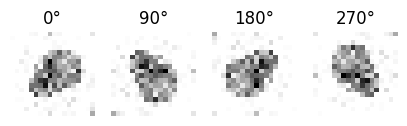

In [19]:
# Get the first pattern
reference_pattern = task1[0]

# Get the rotations
rotations = rotate_pattern(reference_pattern)

# Plot the rotations
fig, axes = plt.subplots(1, 4, figsize=(5, 5))
titles = ['0°', '90°', '180°', '270°']
for ax, rot, title in zip(axes, rotations, titles):
    ax.imshow(rot, cmap='gray_r')
    ax.set_title(title)
    ax.axis('off')

plt.show()


## 1.b) Listing every pattern as one of the rotation of the first image

After receiving the rotations we will compare each pattern from the data with each rotation and find the degree that way.

Defining a function which will compare a pattern to the rotations of the first pattern and after classifying the representitive counter of the class in the dictionary will be increased with 1.

In [22]:
def classify_pattern(pattern, rotations):
    for i, rot in enumerate(rotations):
        if np.array_equal(pattern, rot):
            return i * 90
    return None

orientation_counts = {0: 0, 90: 0, 180: 0, 270: 0}
classifications = []

for pattern in task1:
    orientation = classify_pattern(pattern, rotations)
    classifications.append(orientation)
    orientation_counts[orientation] += 1

print("Number of patterns in each orientation:")
for orientation, count in orientation_counts.items():
    print(f"{orientation} degrees: {count}")


Number of patterns in each orientation:
0 degrees: 6
90 degrees: 10
180 degrees: 6
270 degrees: 3


## Plotting the dataet and trying to be as close as possible to the providen image

Finally, we will plot the full dataset and we will try to plot the data exact as the plot from the task :)

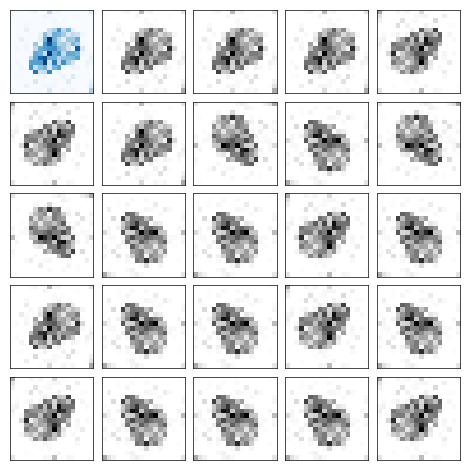

In [23]:
fig, axes = plt.subplots(5, 5, figsize=(5, 5))

for i, (ax, pattern, orientation) in enumerate(zip(axes.flatten(), task1, classifications)):
    if i == 0:
        ax.imshow(pattern, cmap='Blues')
    else:
        ax.imshow(pattern, cmap='gray_r')

    # Make borders
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.5)
    ax.set_xticks([])
    ax.set_yticks([])


plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.show()
